In [1]:
import numpy as np  # For computations
import pandas as pd  # For indexing our data
import matplotlib.pyplot as plt  # for visualizing our data
import re as re
import seaborn as sns

plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

import datetime
from datetime import datetime

# For grabbing data sets
import requests

# For hiding code blocks, as they aren't necessary at this point
from IPython.display import HTML

from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')

import os 
from numpy import cov
from scipy.stats import pearsonr
from scipy import stats

NOTE: Start of Cesar code

# Basic Exploratory Analysis of Data

## Aquire data for analysis
Data sources
1. https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
2. http://hdr.undp.org/en/composite/HDI

In [2]:
#url and path values to get master.csv; check any that works better 
url = 'https://drive.google.com/file/d/1aXAvCPDIqqbC1SfogYX4BPO9U2XXN4KU/view?usp=sharing'
path ='/content/drive/MyDrive/Colab Notebooks/Group/master_downloaded.csv'
localFile = "./master_downloaded.csv"

In [3]:
df = pd.read_csv(localFile,  sep = ',')
df1 = df

#save copy of original
dfOriginal = df

In [4]:
region_url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'

suicide_data = df1

# Null Values
suicide_data.isnull().sum()
region_data = pd.read_csv(region_url)
# Number of Countries per Year
suicide_data.groupby('year', as_index=False)['country'].nunique().transpose()

# Merging Regions Data with Suicide Data Set to include Region in the analysis
suicide_data = pd.merge(left = suicide_data, 
                        right = region_data[['name', 'region']], 
                        left_on  = 'country', 
                        right_on = 'name', how ='left').drop(['name'], axis = 1)

In [5]:
# Exceptions to be taken care of
exceptions={"Czech Republic": "Europe", 
            "Macau": "Asia", 
            "Republic of Korea":"Asia", 
            "Saint Vincent and Grenadines": "Americas", 
            "United Kingdom": "Europe", 
            "United States": "Americas"}
for name, region in exceptions.items():
    suicide_data.loc[suicide_data['country'] == name, 'region'] = region
    
column = suicide_data.columns

In [6]:
pd.pivot_table(data = suicide_data,
               index = 'region',
               columns = 'year',
               values = 'country',
               aggfunc= {'country':'count'})

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
region,,,,,,,,,,,,,,,,,,,,,
Africa,24.0,24.0,24.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,...,36.0,36.0,36.0,36.0,48.0,36.0,36.0,36.0,36.0,10.0
Americas,264.0,264.0,276.0,252.0,276.0,300.0,276.0,252.0,264.0,264.0,...,312.0,324.0,336.0,336.0,324.0,312.0,312.0,264.0,204.0,10.0
Asia,96.0,84.0,96.0,72.0,60.0,144.0,144.0,156.0,144.0,168.0,...,216.0,192.0,228.0,240.0,216.0,192.0,192.0,204.0,156.0,50.0
Europe,168.0,180.0,228.0,228.0,252.0,288.0,300.0,324.0,324.0,336.0,...,432.0,432.0,432.0,420.0,408.0,396.0,396.0,420.0,336.0,90.0
Oceania,24.0,24.0,24.0,24.0,24.0,24.0,36.0,36.0,36.0,36.0,...,36.0,36.0,36.0,24.0,36.0,36.0,24.0,12.0,12.0,NaN


In [7]:
pd.pivot_table(data = suicide_data,
               values = ['population'], 
               index = 'sex',
               aggfunc= {'population':'sum'})

,population
sex,
female,26272781857
male,25049376579


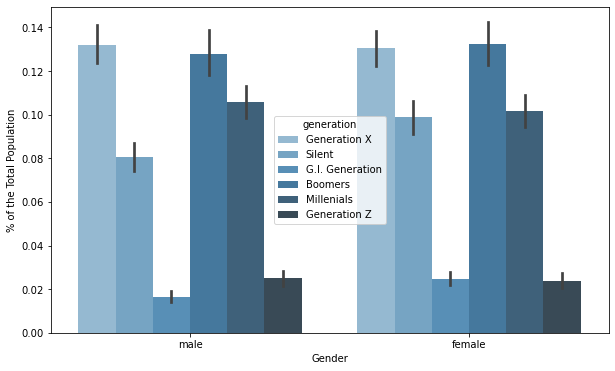

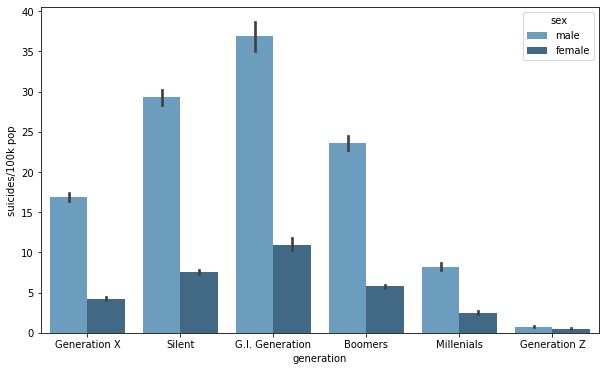

In [8]:
gender = sns.barplot(x="sex", y="population", data=suicide_data, estimator = lambda population: population.sum() / suicide_data['population'].sum(), hue = 'generation', palette="Blues_d")
gender.set(xlabel="Gender", ylabel = "% of the Total Population")
plt.show()

sns.barplot(x='generation', y = 'suicides/100k pop', data = suicide_data, estimator = np.mean, palette="Blues_d", hue = 'sex')
plt.show()

In [9]:
pd.pivot_table(data = suicide_data,
               values = ['population'], 
               index = 'sex', aggfunc = lambda population: population.sum() / suicide_data['population'].sum())

,population
sex,
female,0.511919
male,0.488081


In [10]:
tops = suicide_data.groupby(['country'])['suicides/100k pop'].agg(['mean']).sort_values('mean', ascending = False).reset_index()
tops.tail(10)

,country,mean
91,Maldives,1.367333
92,United Arab Emirates,1.317917
93,Bahamas,1.247391
94,Kuwait,1.186433
95,South Africa,0.964542
96,Oman,0.736111
97,Antigua and Barbuda,0.552901
98,Jamaica,0.521765
99,Saint Kitts and Nevis,0.000000
100,Dominica,0.000000


[Text(0.5, 0, 'AVG of Suicides per 100K hisorically '),
 Text(0, 0.5, 'Country')]

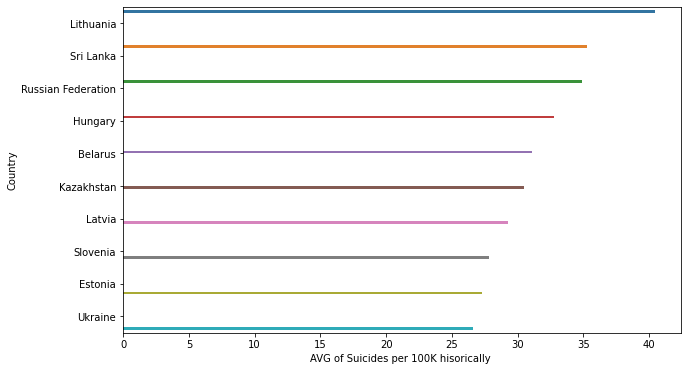

In [11]:
ax = sns.barplot(x = 'mean', y ='country', data = tops.head(10), hue = 'country')
ax.legend([],[], frameon=False)
ax.set(xlabel="AVG of Suicides per 100K hisorically ", ylabel = "Country")

[Text(0.5, 0, 'Average Sucide per 100K'),
 Text(0, 0.5, 'Distribution of Countries %')]

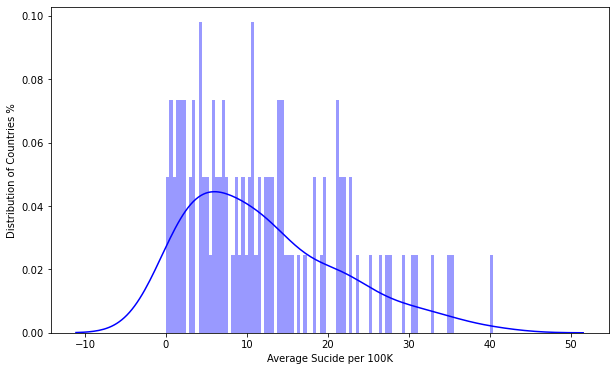

In [12]:
tops_mins = sns.distplot(tops['mean'], bins = 100, hist=True, color = 'b')
tops_mins.set(xlabel="Average Sucide per 100K", ylabel = "Distribution of Countries %")

In [13]:
suicide_data.groupby(['generation'])['suicides/100k pop'].agg(['mean']).sort_values('mean', ascending = False)

,mean
generation,
G.I. Generation,23.946378
Silent,18.418848
Boomers,14.742094
Generation X,10.556874
Millenials,5.383597
Generation Z,0.642299


NOTE: end of Cesar code

<i>NOTE: Nat Yagolnyk's code

# Data Preparation
What was your data source (e.g., web scraping, corporate data, a standard machine learning data set, open data, etc.)? How good was the data quality? What did you need to do to procure it? What tools or code did you need to use to prepare it for analysis? What challenges did you face?

Data sources
1. https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
2. http://hdr.undp.org/en/composite/HDI

This has been imported earlier as df

In [14]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


##Column name preparation

In [15]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Some column names have spaces or special characters that may be a problem in future usage, therefore columns renaming is required:

In [16]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k', 'country_year', 'HDI_for_year',
       'gdp_for_year', 'gdp_per_capita', 'generation']

In [17]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k', 'country_year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

## Data type/value analysis and preparation

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_100k   27820 non-null  float64
 7   country_year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [19]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_100k,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


* column "country_year" is 
concatenation of columns "country" and "year", so it can be removed
* "age" and "generation" are the same data concept but with different names, so a dictionary may be created to remove one of the columns from the main dataframe. 

><i>NOTE: I removed "generation" because its values is not univocal. However, the dictionary may be used later in analysis and visualizations</i>

In [20]:
df.drop('country_year', axis =1, inplace=True)

In [21]:
age_generation = dict(zip(df.age,df.generation))
age_generation

{'15-24 years': 'Millenials',
 '35-54 years': 'Generation X',
 '75+ years': 'Silent',
 '25-34 years': 'Millenials',
 '55-74 years': 'Boomers',
 '5-14 years': 'Generation Z'}

In [22]:
df.drop('generation', axis =1, inplace=True)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k', 'HDI_for_year', 'gdp_for_year', 'gdp_per_capita'],
      dtype='object')

### isNULL analysis and filling in the missing values

In [23]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides_100k         0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
dtype: int64

The only column with NULL values is "HDI_for_year" (that is very well, the quality of initial data is good)

In [24]:
#very possible that such function exists, but it was easier to create it then to look for it
def not_null_percent (df_name,col_name):
  print('column',col_name,
        'has about',
        int(round(100-df_name[col_name].isnull().sum()/len(df)*100)),
        '% of not NULL values')

In [25]:
not_null_percent(df,'HDI_for_year')

column HDI_for_year has about 30 % of not NULL values


HDI has only 30 percent of not NULL values, there are 2 options 
1. remove the column 
2. get data from another source 

<br>the best open official resource for HDI values is UNITED NATIONS DEVELOPMENT PROGRAMME Human Development Reports, http://hdr.undp.org/en/composite/HDI . It is the data of 2020.

><i>NOTE: Colab did not want to read xlsx file directly from hdr.undp.org - HTTP 403 Forbidden; so, I downloaded the file and read it from Google Drive</i>

In [26]:
#the same method as for master.csv:
#download data directly from url or from downloaded path
url_hdi = 'http://hdr.undp.org/sites/default/files/2020_statistical_annex_table_1.xlsx'
path_hdi = '/content/drive/MyDrive/Colab Notebooks/Group/2020_Statistical_Annex_Table_cleaned.xlsx'
local_hdr_file = "2020_HDI.csv"

In [27]:
df_hdi = (pd.read_csv(local_hdr_file)).iloc[: , :3]
df_hdi

,HDI_rank,Country,Value
0,1.0,Norway,0.957
1,2.0,Ireland,0.955
2,2.0,Switzerland,0.955
3,4.0,"Hong Kong, China (SAR)",0.949
4,4.0,Iceland,0.949
...,...,...,...
187,185.0,Burundi,0.433
188,185.0,South Sudan,0.433
189,187.0,Chad,0.398
190,188.0,Central African Republic,0.397


Again, there are 2 options 
1. use HDI data from 2020 only
2. use HDI data from master.csv for existing values and set from hdr.org values(2020)'s instead of NULLs

><i>NOTE: I prefer to use data from 2020 only as HDI values such as they are whole consistent data. <br>
We can check if HDI changes drastically in a country during the years. If it changes vastly, the data for 1 year cannot be applied, however, if the changes were insignificant, the 1-year data is statistically justified.</i>

In [28]:
#check what is the difference between min() and max() by country 
diff_HDI_country = df.groupby('country')['HDI_for_year'].max() - df.groupby('country')['HDI_for_year'].min()
print('1. in provided years, the maximum difference of HDI by country is',
      round(diff_HDI_country.max(),3),
      '\n2. in provided years, the average of HDI change is',
      round(diff_HDI_country.mean(),3))

1. in provided years, the maximum difference of HDI by country is 0.202 
2. in provided years, the average of HDI change is 0.097


> <i>As we can see, the HDI did not change in any country with known data by more than 20%. Moreover, the average changes were less than 10%.<br> Therefore, having such low fullness of data in master.csv, it would be better to use more complete and consistent 2020 data from hdr.org</i>




In [29]:
#merge 2 dataframes by country name
df_merged = pd.merge(left=df,right=df_hdi,how = 'left'
,left_on='country', right_on = 'Country')
df_merged.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides_100k         0
HDI_for_year      19456
gdp_for_year          0
gdp_per_capita        0
HDI_rank           1582
Country            1582
Value              1582
dtype: int64

In [30]:
not_null_percent(df_merged,'Value')

column Value has about 94 % of not NULL values


<li>Rename "Value" to "hdi" (because all the column names are in lowercase)
<li>Remove unrequired columns from the dataframe and insert data from hdr.org

><i>NOTE: "HDI_rank" was removed because it has NA values. This column might be used for indexing, but with NA it is meaningless</i>

In [31]:
df_merged.drop(['HDI_for_year','Country','HDI_rank'], axis =1, inplace=True)

In [32]:
df_merged.rename({'Value':'hdi'},axis=1,inplace=True)

In [33]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_100k   27820 non-null  float64
 7   gdp_for_year    27820 non-null  object 
 8   gdp_per_capita  27820 non-null  int64  
 9   hdi             26238 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 2.3+ MB


In [34]:
not_null_percent(df_merged,'hdi')

column hdi has about 94 % of not NULL values


Because there are just 5% of NULL in HDI data, the NA can be filled in by mean values of the "age" group

In [35]:
df_merged.groupby('age')['hdi'].mean()

age
15-24 years    0.837246
25-34 years    0.837246
35-54 years    0.837246
5-14 years     0.837143
55-74 years    0.837246
75+ years      0.837246
Name: hdi, dtype: float64

In [36]:
df1= df_merged.reset_index()
df1.drop(['index'], axis =1, inplace=True)
df1["hdi"] = df1.groupby("age").transform(lambda x: x.fillna(x.mean()))['hdi']

In [37]:
df1.groupby('age')['hdi'].mean()

age
15-24 years    0.837246
25-34 years    0.837246
35-54 years    0.837246
5-14 years     0.837143
55-74 years    0.837246
75+ years      0.837246
Name: hdi, dtype: float64

In [38]:
df1[df1.isna().any(axis=1)].count()

country           0
year              0
sex               0
age               0
suicides_no       0
population        0
suicides_100k     0
gdp_for_year      0
gdp_per_capita    0
hdi               0
dtype: int64

### Transforming Object type values to Integer


"gdp_for_year" should be int64, but it has commas as dividers; replace commas and convert to Integer


In [39]:
df1['gdp_for_year'] = df1['gdp_for_year'].str.replace(',','')
df1 = df1.astype({'gdp_for_year':int})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_100k   27820 non-null  float64
 7   gdp_for_year    27820 non-null  int64  
 8   gdp_per_capita  27820 non-null  int64  
 9   hdi             27820 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 2.1+ MB


### Max-Min values verification

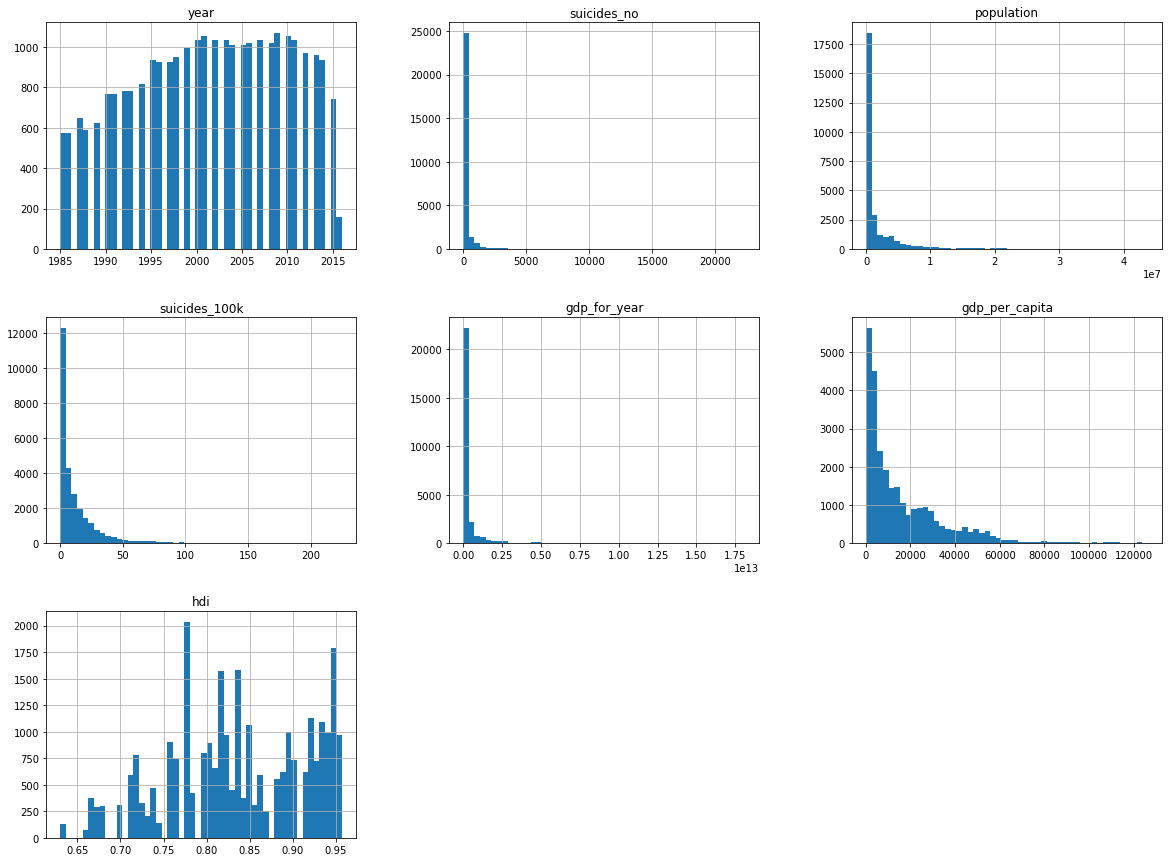

In [40]:
df1.hist(bins=50, figsize=(20,15));

In [41]:
df1.describe()

,year,suicides_no,population,suicides_100k,gdp_for_year,gdp_per_capita,hdi
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414,0.837229
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472,0.079496
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000,0.630000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000,0.779000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000,0.837246
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000,0.916000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000,0.957000


"suicides_no" has a spike value of 22338.000000. Lets investigate: is it a possible value or a misprint?

In [42]:
df1.iloc[df1['suicides_no'].idxmax()]

country           Russian Federation
year                            1994
sex                             male
age                      35-54 years
suicides_no                    22338
population                  19044200
suicides_100k                  117.3
gdp_for_year            395077301248
gdp_per_capita                  2853
hdi                            0.824
Name: 20996, dtype: object

Googled the values, the number of suicides in specified year and country matches other sources; therefore, the data the looks plausible and will be kept for further analysis.

# List of prepared data
1. df : dataframe, contains data for futher analysis
2. age_generation : dictionary, can be used for naming of generations by age in visualizations

In [43]:
df = pd.DataFrame(df1)
type(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_100k   27820 non-null  float64
 7   gdp_for_year    27820 non-null  int64  
 8   gdp_per_capita  27820 non-null  int64  
 9   hdi             27820 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 2.1+ MB


In [44]:
df.head(3)

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_for_year,gdp_per_capita,hdi
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,0.795
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,0.795
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,0.795


In [45]:
df.columns
df_Original1 = df

In [46]:
df_Original1.head()

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_for_year,gdp_per_capita,hdi
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,0.795
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,0.795
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,0.795
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,0.795
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,0.795


<i>NOTE: End of Nat Yagolnyk's code</i>

NOTE: Start of Prashant code

# Analysis of GDP as a driving Factor

In [47]:
##Grouping data fram on Country, Year, GDP Per Capita 
df_suicide_vs_gdp_per_Capita=df.groupby(by=['country','year','gdp_per_capita'])['suicides_no'].agg(['sum'])

In [48]:
#Fomatting the Group by datset
df_suicide_vs_gdp_per_Capita.reset_index(drop=False,inplace=True)
df_suicide_vs_gdp_per_Capita.rename(columns={"country":"country","year":"year","gdp_per_capita":"gdp_per_capita","sum":"total_suicides"},inplace=True)

In [49]:
df_suicide_vs_gdp_per_Capita

,country,year,gdp_per_capita,total_suicides
0,Albania,1987,796,73
1,Albania,1988,769,63
2,Albania,1989,833,68
3,Albania,1992,251,47
4,Albania,1993,437,73
...,...,...,...,...
2316,Uzbekistan,2010,1533,1464
2317,Uzbekistan,2011,1767,1640
2318,Uzbekistan,2012,1964,1835
2319,Uzbekistan,2013,2150,1950


In [50]:
#Calculating correlation between gdp_per_capita and total_suicides
df_out = df_suicide_vs_gdp_per_Capita.groupby('country')[['gdp_per_capita','total_suicides']].corr()
df_correl_by_country=(df_out[~df_out['gdp_per_capita'].eq(1)]
          .reset_index(1, drop=True)['gdp_per_capita']
          .rename('Corr_Coef')
          .reset_index()
)

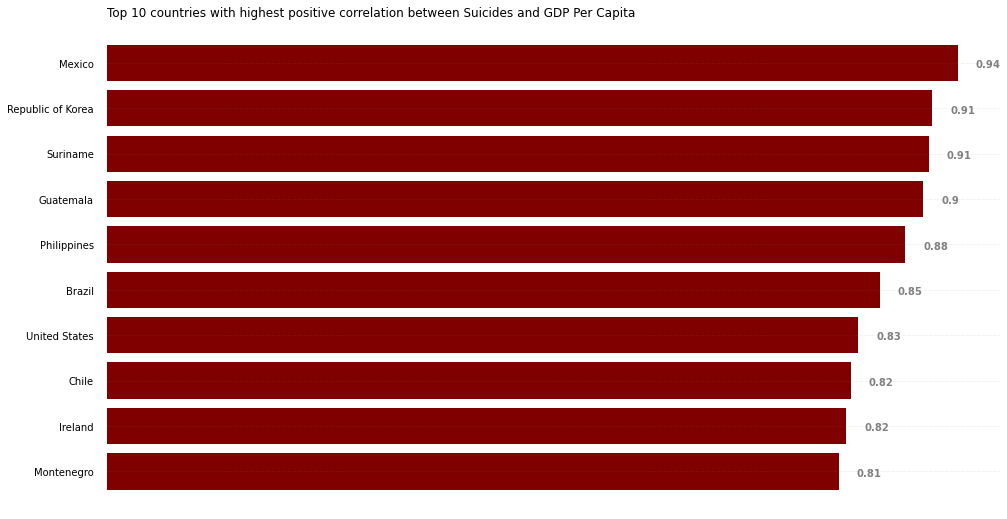

In [51]:
# Prparing a chart for Top 10 countries with highest positive correlation between Suicides and GDP Per Capita
df_correl_by_country.sort_values(by='Corr_Coef',ascending=False,inplace=True)
ctry = df_correl_by_country['country'].head(10)
corr = df_correl_by_country['Corr_Coef'].head(10)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(ctry, corr,color='maroon')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.axes.xaxis.set_visible(False)
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top 10 countries with highest positive correlation between Suicides and GDP Per Capita',
             loc ='left', )

 
# Show Plot
plt.show()

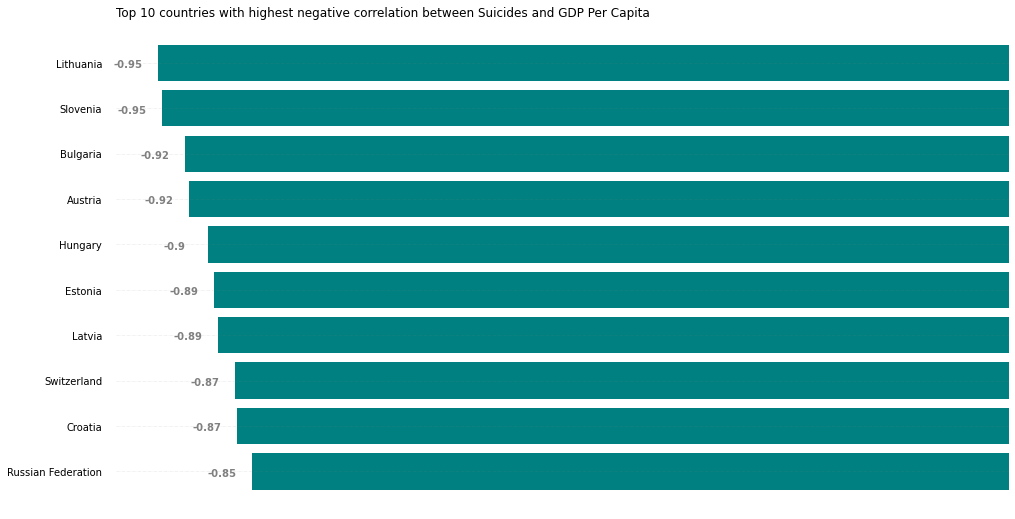

In [52]:
# Preparing a Chart for Top 10 countries with highest negative correlation between Suicides and GDP Per Capita
df_correl_by_country.sort_values(by='Corr_Coef',ascending=True,inplace=True)
ctry = df_correl_by_country['country'].head(10)
corr = df_correl_by_country['Corr_Coef'].head(10)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(ctry, corr,color='teal')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.axes.xaxis.set_visible(False)
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()-0.05, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top 10 countries with highest negative correlation between Suicides and GDP Per Capita',
             loc ='left', )

 
# Show Plot
plt.show()

In [53]:
df_out = df_suicide_vs_gdp_per_Capita[df_suicide_vs_gdp_per_Capita['year']>=2006].groupby('country')[['gdp_per_capita','total_suicides']].corr()
df_correl_by_country_10_yrs=(df_out[~df_out['gdp_per_capita'].eq(1)]
          .reset_index(1, drop=True)['gdp_per_capita']
          .rename('Corr_Coef')
          .reset_index()
)

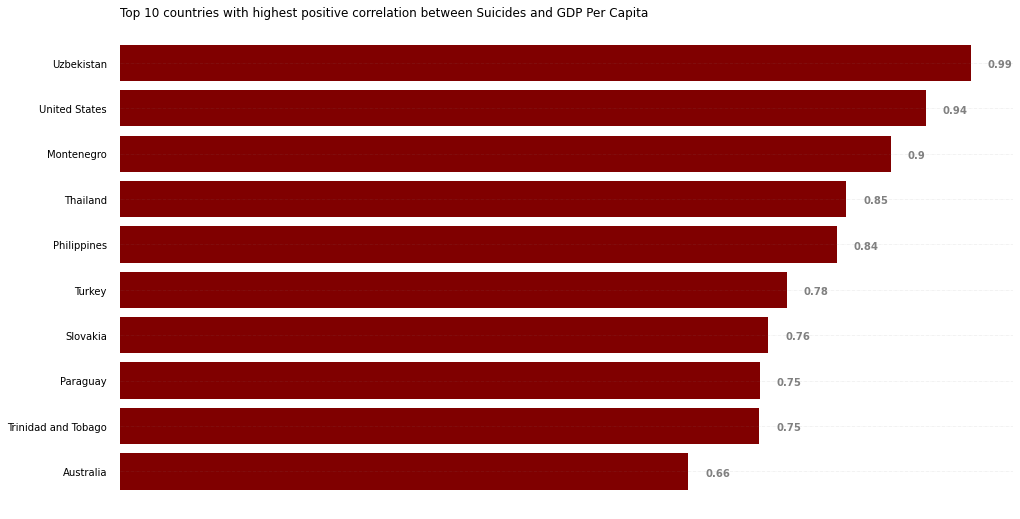

In [54]:
#Preparing chart for Top 10 countries with highest positive correlation between Suicides and GDP Per Capita 
#(Data only for the recent years 2006 onwards)
df_correl_by_country_10_yrs.sort_values(by='Corr_Coef',ascending=False,inplace=True)
ctry = df_correl_by_country_10_yrs['country'].head(10)
corr = df_correl_by_country_10_yrs['Corr_Coef'].head(10)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(ctry, corr,color='maroon')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.axes.xaxis.set_visible(False)
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top 10 countries with highest positive correlation between Suicides and GDP Per Capita',
             loc ='left', )

 
# Show Plot
plt.show()

In [55]:
#Grouping initial data to calculate the total sucides by country
df_suicide_vs_cntry=df.groupby(by=['country'])['suicides_no'].agg(['sum'])

In [56]:
#Formatting the dataset with total sucides by country
df_suicide_vs_cntry.reset_index(drop=False,inplace=True)
df_suicide_vs_cntry.rename(columns={"country":"country","sum":"total_suicides"},inplace=True)
df_suicide_vs_cntry.set_index("country")

,total_suicides
country,
Albania,1970
Antigua and Barbuda,11
Argentina,82219
Armenia,1905
Aruba,101
...,...
United Arab Emirates,622
United Kingdom,136805
United States,1034013


In [57]:
#Grouping data to check the number of years for which we have data for each individual county
df_yrs_of_data=df.groupby(by=['country'])['year'].agg(['nunique'])



In [58]:
#Formatting the dataset prepared above
df_yrs_of_data.reset_index(drop=False,inplace=True)
df_yrs_of_data.rename(columns={"country":"country","nunique":"total_yrs_of_data"},inplace=True)
df_yrs_of_data.set_index("country")

,total_yrs_of_data
country,
Albania,22
Antigua and Barbuda,27
Argentina,31
Armenia,25
Aruba,14
...,...
United Arab Emirates,6
United Kingdom,31
United States,31


In [59]:
#Creating a table with # of years of data and total sucides for each country
df_cntry_suic_yrs=df_suicide_vs_cntry.merge(df_yrs_of_data,on="country",how="left")

In [60]:
df_cntry_suic_yrs.sort_values(by='total_suicides',ascending=False,inplace=True)

In [61]:
#Identifying the top 10 countries with max suicides
df_cntry_suic_yrs['country'].head(10)

75    Russian Federation
98         United States
46                 Japan
33                France
95               Ukraine
35               Germany
73     Republic of Korea
15                Brazil
69                Poland
97        United Kingdom
Name: country, dtype: object

In [62]:
#Filtering Nat's dataset to include only the top 5 countries with max sucides
df_top_5=df[df['country'].isin(["Russian Federation","United States","Japan","France","Ukraine"])]

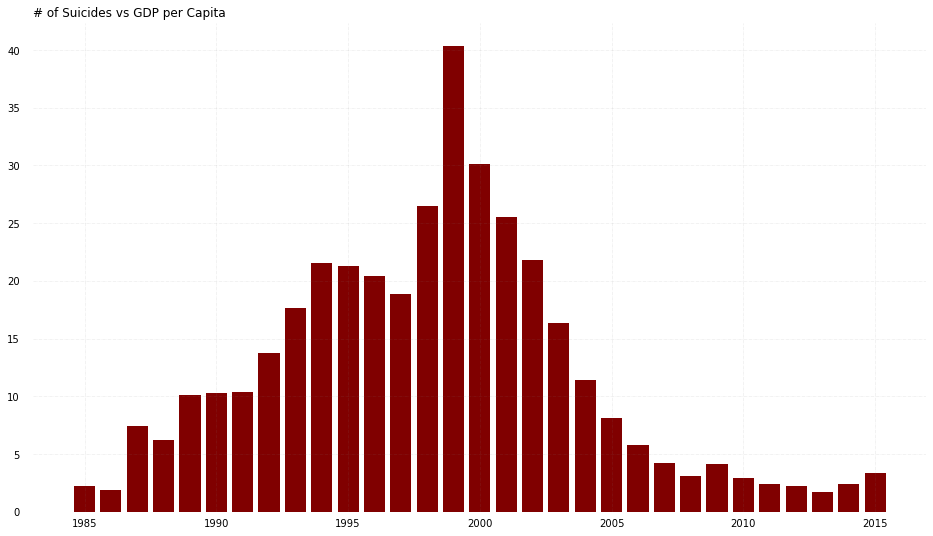

In [63]:
# Trending the Top 10 countries with highest number of suicides on Total Sucides by GDP per capita
df_top_5=df_suicide_vs_gdp_per_Capita[df_suicide_vs_gdp_per_Capita['country'].isin(df_cntry_suic_yrs['country'].head(10))]
ctry = df_top_5['year']
corr = df_top_5['total_suicides']/df_top_5['gdp_per_capita']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.bar(ctry, corr,color='maroon')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.yaxis.set_tick_params(pad = 10)

 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
 
# Add Plot Title
ax.set_title('# of Suicides vs GDP per Capita',
             loc ='left', )

 
# Show Plot
plt.show()

In [64]:
df_top_5

,country,year,gdp_per_capita,total_suicides
348,Brazil,1985,1898,4228
349,Brazil,1986,2257,4271
350,Brazil,1987,2394,4672
351,Brazil,1988,2628,4466
352,Brazil,1989,3310,4463
...,...,...,...,...
2266,United States,2011,53452,39508
2267,United States,2012,55170,40596
2268,United States,2013,56520,41143
2269,United States,2014,58531,42769


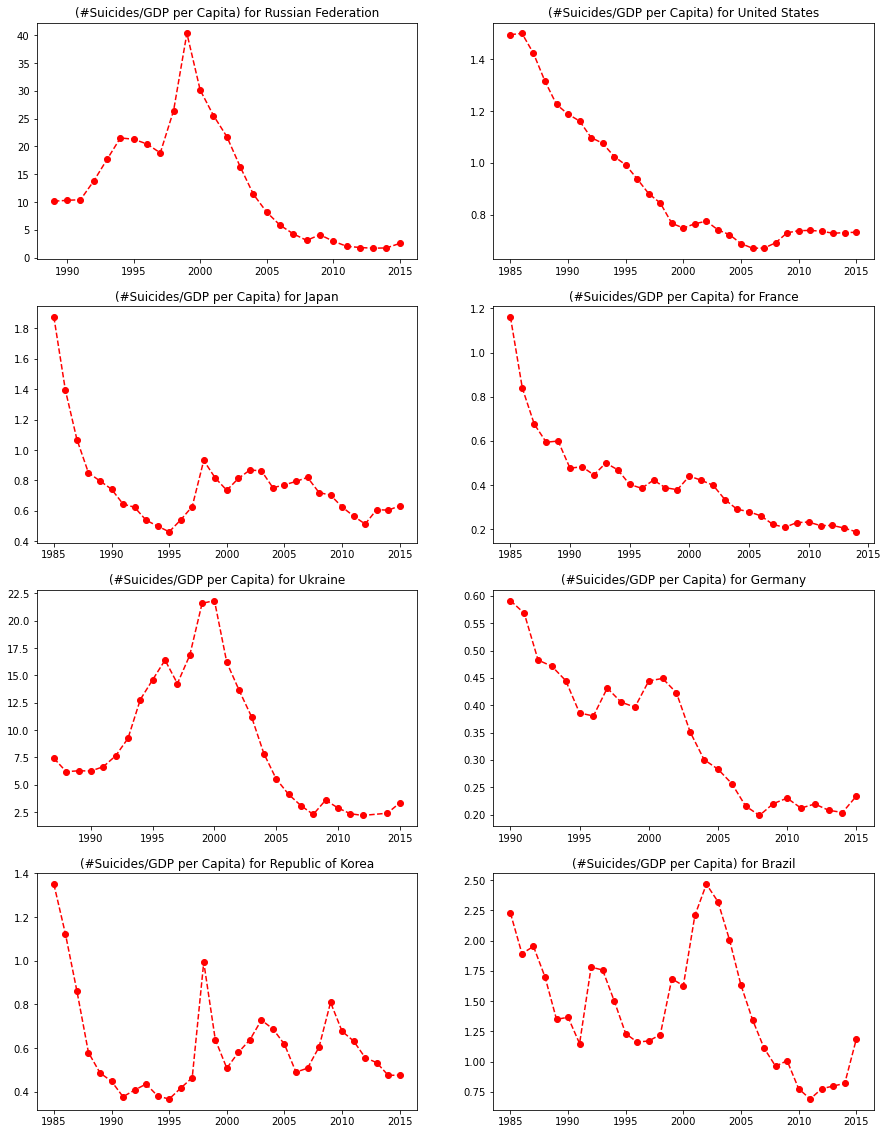

In [65]:
# Ploting the sucides/GDP per capita in countries with higest # of suicidess
data = df_suicide_vs_gdp_per_Capita
countries = df_cntry_suic_yrs['country'].head(9).tolist()
plt.figure(1, figsize=(15,20))
# Now create a figure
#fig, ax = plt.subplots(1,5, figsize=(15,30))

# Now plot each zone on a particular axis
for i in range(1,9):
    ax=plt.subplot(420 + i)
    x_axis=data[data['country']==countries[i-1]]['year']
    y_axis=(data[data['country']==countries[i-1]]['total_suicides'])/(data[data['country']==countries[i-1]]['gdp_per_capita'])
    ax.set_title('(#Suicides/GDP per Capita) for '+countries[i-1])
    ax.plot(x_axis,y_axis,'ro--',scaley=True)


Note: end of prashant code

Note: start of Afia code

# Analyzing Suicide Rate Among Different Countries

In [66]:
df

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_for_year,gdp_per_capita,hdi
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,0.795
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,0.795
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,0.795
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,0.795
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,0.795
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,0.720
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,0.720
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,0.720
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,0.720


In [67]:
# Grouping by country
df_sumByCountry = df.groupby(["country","sex"]).agg({'gdp_per_capita': 'mean', 'suicides_no' : 'mean', 'population' : "mean"}).sort_values(by=['suicides_no'],  ascending=False).reset_index()

df_sumByCountry.head(5)

df_sumByCountry["Suicides/Population"] = df_sumByCountry.suicides_no/df_sumByCountry.population
df_sumByCountry = df_sumByCountry.sort_values(by=['Suicides/Population'],  ascending=False)
df_sumByCountry.tail(30)
df_sumByCountry["Suicides/Population"].mean()

0.00011200561031431658

In [68]:
df_sumByCountry

,country,sex,gdp_per_capita,suicides_no,population,Suicides/Population
42,Lithuania,male,9280.549618,175.786260,2.402566e+05,0.000732
0,Russian Federation,male,6518.814815,6144.518519,1.055612e+07,0.000582
23,Belarus,male,3333.904762,395.952381,7.280138e+05,0.000544
64,Latvia,male,8961.095238,81.714286,1.627728e+05,0.000502
25,Hungary,male,9370.051613,359.845161,7.608708e+05,0.000473
...,...,...,...,...,...,...
197,Oman,female,20740.666667,0.000000,1.853696e+05,0.000000
198,Saint Kitts and Nevis,female,5525.000000,0.000000,3.400000e+03,0.000000
199,Saint Kitts and Nevis,male,5525.000000,0.000000,3.116667e+03,0.000000
200,San Marino,female,53663.666667,0.000000,2.248167e+03,0.000000


Text(0, 0.5, 'Suicide/Population')

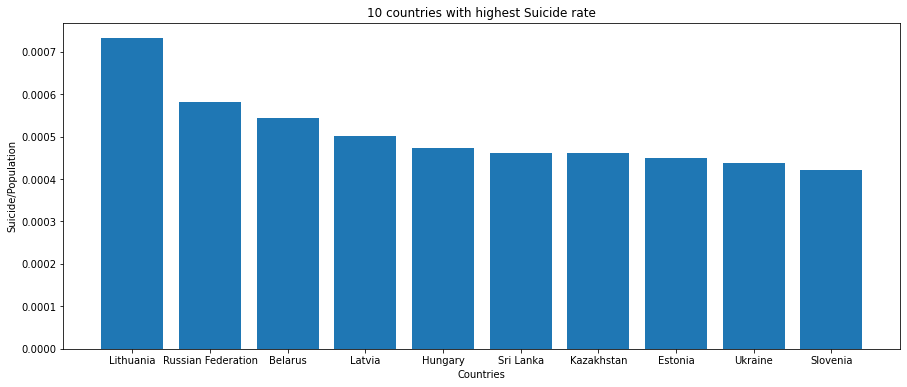

In [69]:
# Plotting the top 10 countries with highest suicide rates
plt.figure(figsize=(15,6))
plt.bar(df_sumByCountry["country"].head(10), df_sumByCountry["Suicides/Population"].head(10))
plt.title('10 countries with highest Suicide rate')
plt.xlabel('Countries')
plt.ylabel('Suicide/Population')

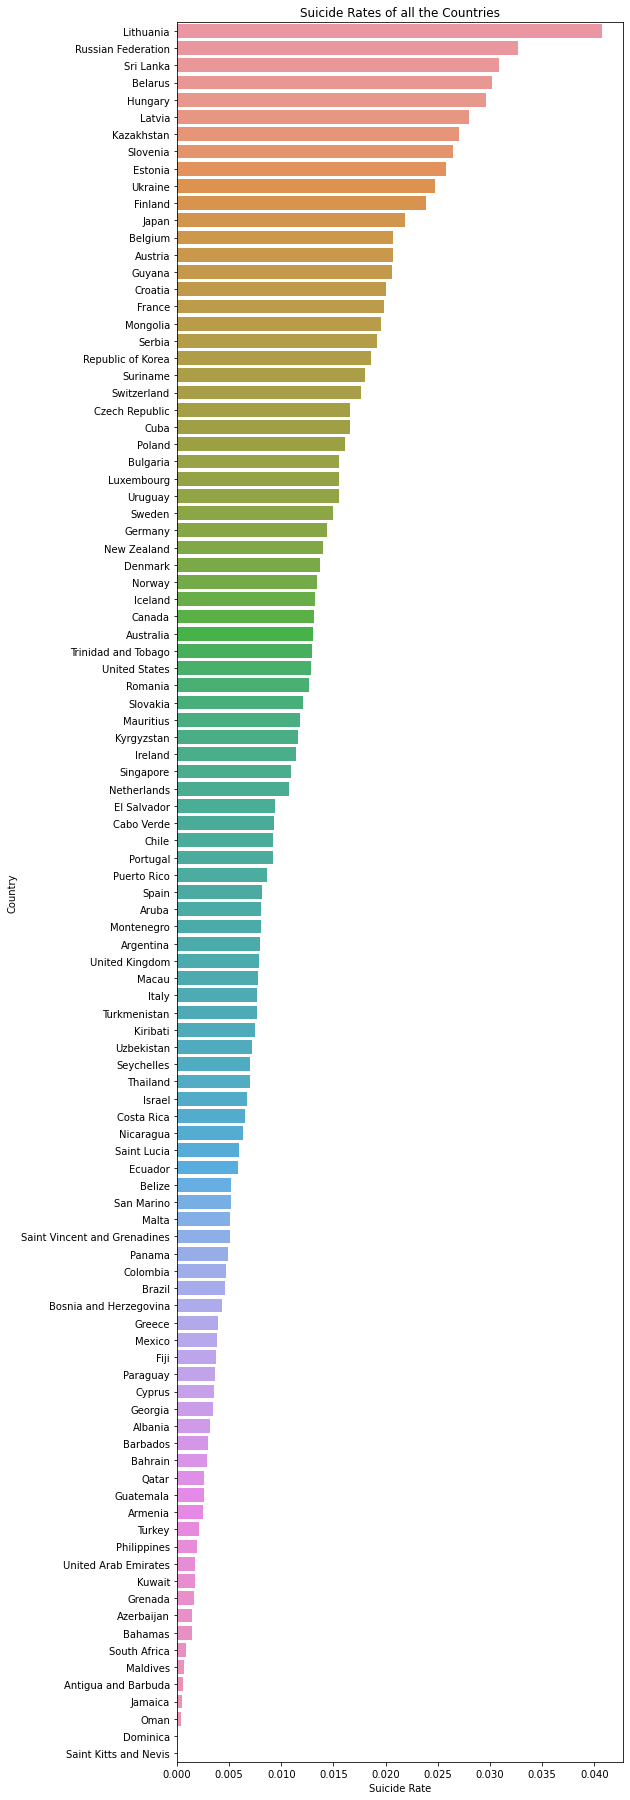

In [70]:
# Plotting the suicide rates of all the countries
df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:])
plt.xlabel("Suicide Rate")
plt.ylabel("Country")
plt.title("Suicide Rates of all the Countries")
plt.show()

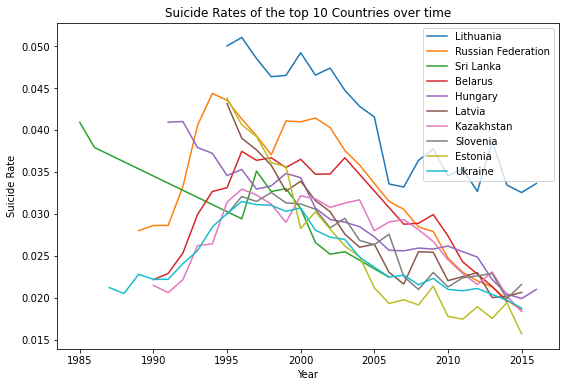

In [71]:
# Plotting the suicide rates of countries over time
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country)
plt.xlabel("Year")
plt.ylabel("Suicide Rate")
plt.title("Suicide Rates of the top 10 Countries over time")

plt.legend()
plt.show()

Text(0, 0.5, 'Number of Suicides')

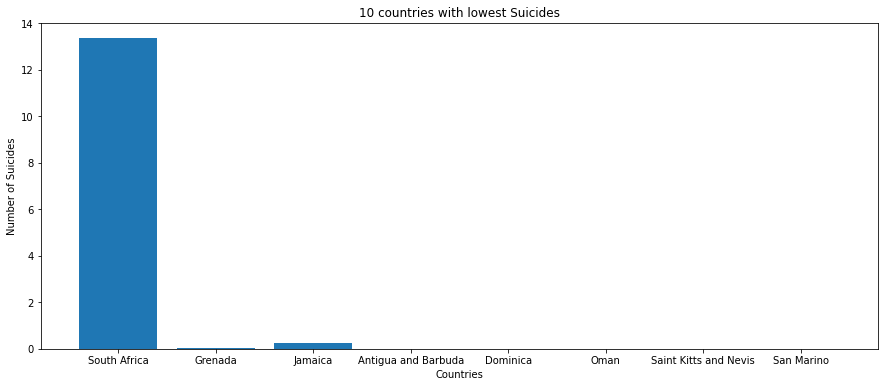

In [72]:
# Plotting the top 10 countries with the lowest number of suicides
plt.figure(figsize=(15,6))
plt.bar(df_sumByCountry["country"].tail(10), df_sumByCountry["suicides_no"].tail(10))
plt.title('10 countries with lowest Suicides')
plt.xlabel('Countries')
plt.ylabel('Number of Suicides')

Text(0, 0.5, 'Suicide/Population')

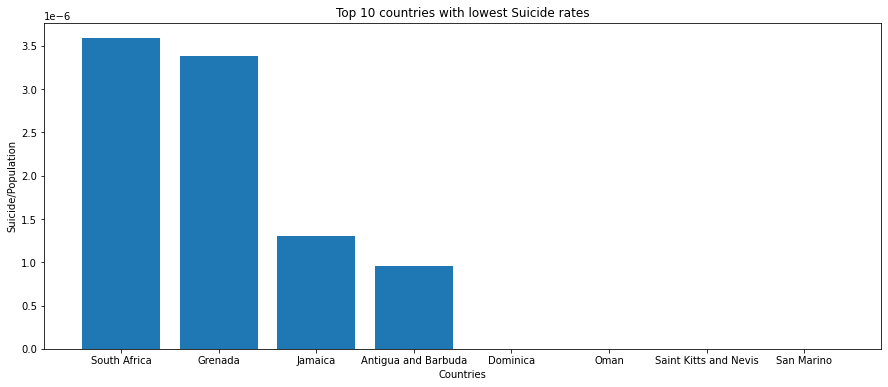

In [73]:
# Plotting the top 10 countries with the lowest suicide rates
plt.figure(figsize=(15,6))
plt.bar(df_sumByCountry["country"].tail(10), df_sumByCountry["Suicides/Population"].tail(10))
plt.title('Top 10 countries with lowest Suicide rates')
plt.xlabel('Countries')
plt.ylabel('Suicide/Population')

Text(0.5, 1.0, 'GDP for countries with highest Suicides Rates')

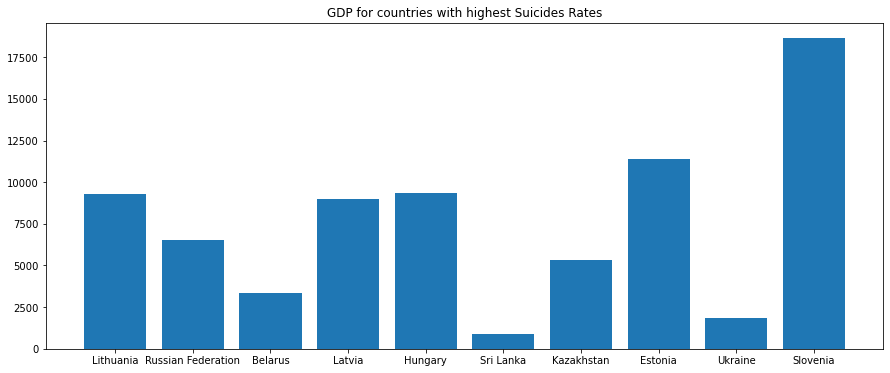

In [74]:
# GDP of the countries with the highest suicide rates
plt.figure(figsize=(15,6))
plt.bar(df_sumByCountry["country"].head(10), df_sumByCountry["gdp_per_capita"].head(10))
plt.title('GDP for countries with highest Suicides Rates')

Text(0.5, 1.0, 'GDP for countries with lowest Suicide Rates')

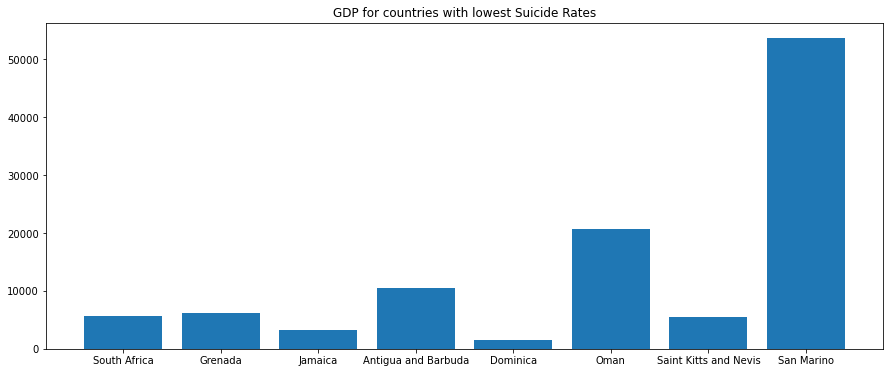

In [75]:
# GDP of the countries with the lowest suicide rates
plt.figure(figsize=(15,6))
plt.bar(df_sumByCountry["country"].tail(10), df_sumByCountry["gdp_per_capita"].tail(10))
plt.title('GDP for countries with lowest Suicide Rates')

,year,suicides_no,population,suicides_100k,gdp_for_year,gdp_per_capita,hdi
year,1.000000,-0.004546,0.008850,-0.039037,0.094529,0.339134,-0.009583
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.430096,0.061330,0.103650
population,0.008850,0.616162,1.000000,0.008285,0.710697,0.081510,0.092281
suicides_100k,-0.039037,0.306604,0.008285,1.000000,0.025240,0.001785,0.136810
gdp_for_year,0.094529,0.430096,0.710697,0.025240,1.000000,0.303405,0.258613
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,0.303405,1.000000,0.660949
hdi,-0.009583,0.103650,0.092281,0.136810,0.258613,0.660949,1.000000


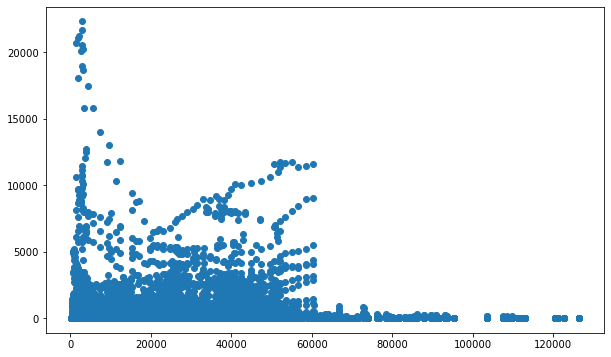

In [76]:
# Looking at the correlation between the variables
plt.scatter(df.gdp_per_capita, df.suicides_no)
corr, _ = pearsonr(df.gdp_per_capita, df.suicides_no)
np.corrcoef(df.gdp_per_capita, df.suicides_no)
df.corr()

In [77]:
# Looking at the correlation between the variables by country
df.groupby('country').corr()

year  suicides_no  population  suicides_100k  \
country                                                                       
Albania    year            1.000000     0.038497   -0.010609       0.036754   
           suicides_no     0.038497     1.000000    0.328321       0.716737   
           population     -0.010609     0.328321    1.000000      -0.215599   
           suicides_100k   0.036754     0.716737   -0.215599       1.000000   
           gdp_for_year    0.888771    -0.025091   -0.028918      -0.034146   
...                             ...          ...         ...            ...   
Uzbekistan population      0.248892     0.358165    1.000000      -0.270864   
           suicides_100k  -0.250904     0.708387   -0.270864       1.000000   
           gdp_for_year    0.818447     0.083370    0.198368      -0.168834   
           gdp_per_capita  0.753732     0.080867    0.181274      -0.150211   
           hdi                  NaN          NaN         NaN            NaN   

                           gdp_for_year  gdp_per_capita  hdi  
country                                                       
Albania    year                0.888771        0.881965  NaN  
           suicides_no        -0.025091       -0.031869  NaN  
           population         -0.028918       -0.030255  NaN  
           suicides_100k      -0.034146       -0.042008  NaN  
           gdp_for_year        1.000000        0.999652  NaN  
...                                 ...             ...  ...  
Uzbekistan population          0.198368        0.181274  NaN  
           suicides_100k      -0.168834       -0.150211  NaN  
           gdp_for_year        1.000000        0.993829  NaN  
           gdp_per_capita      0.993829        1.000000  NaN  
           hdi                      NaN             NaN  NaN  

[707 rows x 7 columns]

In [78]:
# Looking at the correlation between the number of suicides and gdp per capita for each country
corrs = (df[['country', 'gdp_per_capita']].groupby('country').corrwith(df.suicides_no).rename(columns={'gdp_per_capita':'Correlation Coefficient'}))
corrs.sort_values(by=['Correlation Coefficient']).tail(15)
# Conclusion: weak correlation

,Correlation Coefficient
country,
Jamaica,0.272362
Belize,0.273902
Philippines,0.308772
Mexico,0.313678
Guatemala,0.332748
Paraguay,0.353426
Suriname,0.368962
Republic of Korea,0.409991
Montenegro,0.505328


Note: end Afia Code

Note: start of Eric code

# Analysis of Suicide Rates by Gender

In [79]:
#group df by gender
dfGender = df.groupby(by=["sex"])

dfGender["suicides_100k"].mean()

sex
female     5.392866
male      20.239329
Name: suicides_100k, dtype: float64

Text(0.5, 1.0, 'Global Suicide Rates Per Gender')

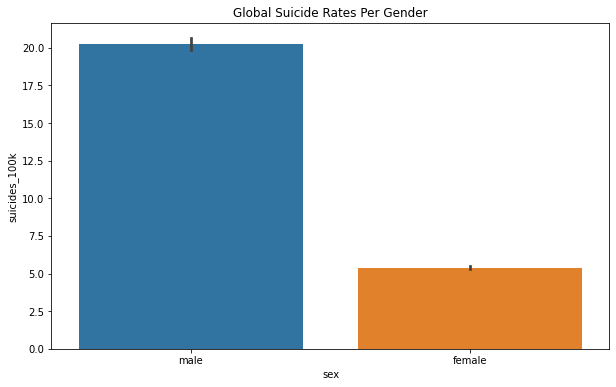

In [80]:
b= sns.barplot(x=df.sex, y = df.suicides_100k)
b.set_title("Global Suicide Rates Per Gender")

### Can gender trends be further explained by age?

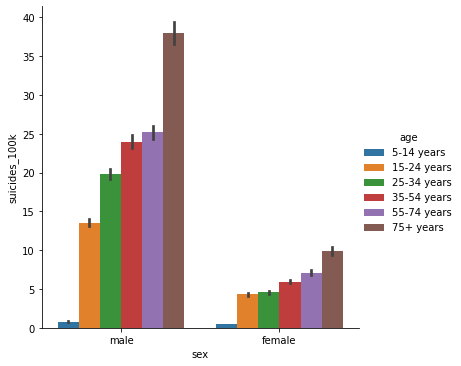

In [81]:
c = sns.catplot(x="sex", y="suicides_100k", hue="age", kind="bar", data=df, 
            hue_order=["5-14 years","15-24 years", "25-34 years", "35-54 years", 
                   "55-74 years", "75+ years"]);

## Finally, lets look at gender trends vs country

In [82]:
dfGenderCountry = df.groupby(["sex","country"])["suicides_100k"].agg(['mean'])
dfGenderCountry

mean
sex    country                        
female Albania                2.416515
       Antigua and Barbuda    0.096420
       Argentina              3.795968
       Armenia                1.606779
       Aruba                  3.289881
...                                ...
male   United Arab Emirates   1.668889
       United Kingdom        11.602796
       United States         22.963226
       Uruguay               32.409048
       Uzbekistan            11.862045

[202 rows x 1 columns]

In [83]:
dfGenderCountry.sort_values("mean", ascending=False).groupby("sex").head(10)

mean
sex    country                      
male   Lithuania           67.956947
       Russian Federation  58.183704
       Sri Lanka           55.091667
       Belarus             52.757619
       Hungary             51.419355
       Kazakhstan          50.014038
       Latvia              48.775873
       Slovenia            45.174206
       Estonia             45.056984
       Ukraine             44.253393
female Sri Lanka           15.498636
       Republic of Korea   14.812527
       Hungary             14.103677
       Japan               13.692688
       Lithuania           12.874198
       Macau               12.796667
       Singapore           12.669355
       Russian Federation  11.601049
       Kazakhstan          11.008526
       Serbia              10.815556

# Analysis of suicide rates by Age

In [84]:
dfAge = df.groupby('age', as_index=False)["suicides_100k"].agg(["mean"]).reset_index().reindex([3,0,1,2,4,5])
dfAge

,age,mean
3,5-14 years,0.620041
0,15-24 years,8.947154
1,25-34 years,12.186885
2,35-54 years,14.947441
4,55-74 years,16.155579
5,75+ years,23.955409


Text(0, 0.5, 'Suicides/100k')

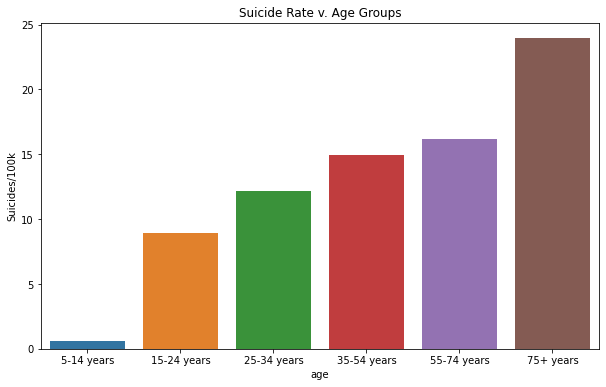

In [85]:
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)
d= sns.barplot(x="age", y="mean", data = dfAge, ax=ax)
d.set_title("Suicide Rate v. Age Groups")
d.set_ylabel("Suicides/100k")

## Investigating the relationship between Age of suicide and Country

In [86]:
#change age group "5-14" to "05-14" so it appears first in table
def convertAgeGroup(age):
    if age == "5-14 years":
        age="05-14 years"
    return age

dfTemp = df
dfTemp.age = dfTemp.age.apply(convertAgeGroup)
dfAgeCountry = dfTemp.groupby(["age","country"])["suicides_100k"].agg({"mean"})
dfAgeCountry

mean
age         country                        
05-14 years Albania                0.433864
            Antigua and Barbuda    0.000000
            Argentina              0.682581
            Armenia                0.196250
            Aruba                  0.000000
...                                     ...
75+ years   United Arab Emirates   0.788333
            United Kingdom         9.772581
            United States         24.683387
            Uruguay               45.708929
            Uzbekistan             8.578636

[605 rows x 1 columns]

In [87]:
dfTemp = dfAgeCountry = dfAgeCountry.sort_values("mean", ascending=False).groupby("age").head(3).sort_values(["age", "mean"])
dfTemp.rename(columns={"mean":"Avg Suicides/100k"})

Avg Suicides/100k
age         country                              
05-14 years Kazakhstan                   2.605962
            Cabo Verde                   2.620000
            Kiribati                     2.695000
15-24 years Russian Federation          25.338148
            Lithuania                   25.617500
            Sri Lanka                   37.480455
25-34 years Russian Federation          39.166111
            Lithuania                   39.680909
            Sri Lanka                   39.816818
35-54 years Russian Federation          44.052407
            Belarus                     44.293571
            Lithuania                   61.289773
55-74 years Hungary                     44.080962
            Belarus                     44.561667
            Lithuania                   56.728182
75+ years   Serbia                      66.117500
            Republic of Korea           69.262258
            Hungary                     81.673462

# Outlier Analysis

In the following section, we will attempt to identify any spikes in suicide rates per year in a given country

General strategy will be to identify the average amount of suicides for a given country, and then identify the years in which that country had a greater than normal suicide rate (as determined by rate > mean(rate) + 1 std)

In [88]:
outliers = df[['suicides_100k', 'country', 'year']]

In [89]:
outliers

,suicides_100k,country,year
0,6.71,Albania,1987
1,5.19,Albania,1987
2,4.83,Albania,1987
3,4.59,Albania,1987
4,3.28,Albania,1987
...,...,...,...
27815,2.96,Uzbekistan,2014
27816,2.58,Uzbekistan,2014
27817,2.17,Uzbekistan,2014
27818,1.67,Uzbekistan,2014


In [90]:
outliers = outliers.groupby(["country","year"], as_index=False)["suicides_100k"].mean()

In [91]:
outliers

,country,year,suicides_100k
0,Albania,1987,2.654167
1,Albania,1988,2.705000
2,Albania,1989,2.783333
3,Albania,1992,1.500000
4,Albania,1993,2.713333
...,...,...,...
2316,Uzbekistan,2010,5.269167
2317,Uzbekistan,2011,5.595000
2318,Uzbekistan,2012,6.460833
2319,Uzbekistan,2013,6.571667


In [92]:
means = outliers.groupby("country", as_index=False)["suicides_100k"].mean()
means.rename(columns={"suicides_100k" : "mean_suicides"})

,country,mean_suicides
0,Albania,3.502879
1,Antigua and Barbuda,0.552901
2,Argentina,10.469328
3,Armenia,3.281073
4,Aruba,9.503095
...,...,...
96,United Arab Emirates,1.317917
97,United Kingdom,7.502473
98,United States,13.819812
99,Uruguay,19.461190


In [93]:
means.tail()

,country,suicides_100k
96,United Arab Emirates,1.317917
97,United Kingdom,7.502473
98,United States,13.819812
99,Uruguay,19.461190
100,Uzbekistan,8.099129


In [94]:
stds = outliers.groupby("country", as_index=False)["suicides_100k"].std()
stds.rename(columns={"suicides_100k" : "std_suicides"})

,country,std_suicides
0,Albania,1.976574
1,Antigua and Barbuda,0.992964
2,Argentina,1.121304
3,Armenia,0.742499
4,Aruba,7.706127
...,...,...
96,United Arab Emirates,0.334366
97,United Kingdom,0.951195
98,United States,1.294996
99,Uruguay,3.261579


In [95]:
outliers = outliers.merge(means, on='country', how='inner', suffixes=('', '_mean'))

In [96]:
outliers = outliers.merge(stds, on='country', how='inner', suffixes=('','_std'))

In [97]:
outliers

,country,year,suicides_100k,suicides_100k_mean,suicides_100k_std
0,Albania,1987,2.654167,3.502879,1.976574
1,Albania,1988,2.705000,3.502879,1.976574
2,Albania,1989,2.783333,3.502879,1.976574
3,Albania,1992,1.500000,3.502879,1.976574
4,Albania,1993,2.713333,3.502879,1.976574
...,...,...,...,...,...
2316,Uzbekistan,2010,5.269167,8.099129,1.905096
2317,Uzbekistan,2011,5.595000,8.099129,1.905096
2318,Uzbekistan,2012,6.460833,8.099129,1.905096
2319,Uzbekistan,2013,6.571667,8.099129,1.905096


In [98]:
outliers2  = outliers[(outliers["suicides_100k"] > (outliers["suicides_100k_mean"] + outliers["suicides_100k_std"]))]

In [99]:
outliers2

,country,year,suicides_100k,suicides_100k_mean,suicides_100k_std
8,Albania,1997,6.452500,3.502879,1.976574
9,Albania,1998,5.543333,3.502879,1.976574
10,Albania,1999,5.817500,3.502879,1.976574
18,Albania,2007,5.487500,3.502879,1.976574
19,Albania,2008,5.920833,3.502879,1.976574
...,...,...,...,...,...
2286,Uruguay,2002,27.640833,19.461190,3.261579
2299,Uzbekistan,1990,10.780000,8.099129,1.905096
2300,Uzbekistan,1991,10.348333,8.099129,1.905096
2305,Uzbekistan,1996,10.421667,8.099129,1.905096


There are 391 country-years which had more than a std increase in suicide rate.  Since this is more than I expected and too many to browse through manually, I will group by year to determine which years had the most above-average suicide rates in their respective countries

In [100]:
outliers2 = outliers2.groupby("year", as_index=False)["country"].count()

In [101]:
outliers2

,year,country
0,1985,16
1,1986,17
2,1987,23
3,1988,22
4,1989,16
...,...,...
27,2012,2
28,2013,6
29,2014,7
30,2015,5


In [102]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_for_year,gdp_per_capita,hdi
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,0.795
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,0.795
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,0.795
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,0.795
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,0.795


In [103]:
# need to normalize the data with the number of countries reporting data in that year since this can change
numberOfCountries = df[["year", "country", "suicides_100k"]]
numberOfCountries.head()

,year,country,suicides_100k
0,1987,Albania,6.71
1,1987,Albania,5.19
2,1987,Albania,4.83
3,1987,Albania,4.59
4,1987,Albania,3.28


In [104]:
numberOfCountries = numberOfCountries.groupby(["year", "country"], as_index=False)["suicides_100k"].mean()
numberOfCountries = numberOfCountries.groupby("year",as_index=False)["country"].count()
normalizedOutliers = outliers2.merge(numberOfCountries, on='year', how='left', suffixes=('', '_total_reporting'))
normalizedOutliers

,year,country,country_total_reporting
0,1985,16,48
1,1986,17,48
2,1987,23,54
3,1988,22,49
4,1989,16,52
...,...,...,...
27,2012,2,81
28,2013,6,80
29,2014,7,78
30,2015,5,62


In [105]:
# column percentHighSuicides will show the percent of reporting coutries for a given year that have 1 std high increase in suicide rate

normalizedOutliers["percentHighSuicides"] = round((normalizedOutliers["country"]/normalizedOutliers["country_total_reporting"])*100,2)

In [106]:
normalizedOutliers.reset_index(drop=True)
normalizedOutliers.rename(columns={"country":"countries_with_high_rates", "percentHighSuicides":"percent_high_suicides"})

,year,countries_with_high_rates,country_total_reporting,percent_high_suicides
0,1985,16,48,33.33
1,1986,17,48,35.42
2,1987,23,54,42.59
3,1988,22,49,44.90
4,1989,16,52,30.77
...,...,...,...,...
27,2012,2,81,2.47
28,2013,6,80,7.50
29,2014,7,78,8.97
30,2015,5,62,8.06


Note: end of Eric code

Note: start of Lamjed code

# Machine Learning Analysis

**Correlation** Now let's take a look of the correlation of each column. Seaborn makes it easy to do the correlation. in the correlation matrix below, the higher the correlation coefficient between two variables. the deepper the color is.

<AxesSubplot:>

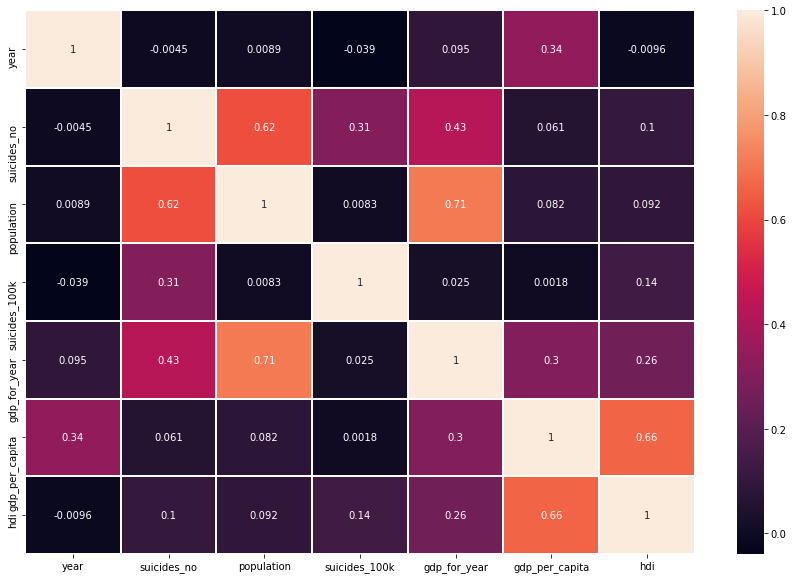

In [107]:
df = df_Original1
#visualizing the correlation using the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth=1)

#it plots every columns against one another for both genders
#sns.pairplot(df,hue='sex',palette='magma') #mako

From the Correlation Heatmap, we see that the suicides number are obvisely related to the population. And the gdp per capita is highly related to the HDI for the year. What suprises me is that the suicides_number has less correlation with the gdp per capita. Before doing this correlation, I thought the suicide number would have a high correlation with gdp that hihger gdp would have less suicide number, turns out, that's not true

### Dataset Standarlization

Note: for ML, categorical features should be one-hot encoded as new dummy variable

Splitting Data:

In [108]:
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [109]:
#encoding the categorical features with LabelEncoder
categorical = ['country', 'year','age', 'sex']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    df[column] = le.fit_transform(df[column])

In [110]:
numerical = ['hdi','gdp_for_year','population','gdp_per_capita']    #numeric_features=['hdi','gdp_for_year','population','gdp_per_capita']

rc = RobustScaler()
df[numerical] = rc.fit_transform(df[numerical])

In [111]:
X = df.drop (['suicides_100k', 'suicides_no'], axis=1) #delete some "duplicate" features 
y= df['suicides_100k']
X.shape, y.shape

((27820, 8), (27820,))

In [112]:
X.columns

Index(['country', 'year', 'sex', 'age', 'population', 'gdp_for_year',
       'gdp_per_capita', 'hdi'],
      dtype='object')

# Model Building & Training

In this section, we finally start to buiding the ML model. I want to use Linear Regression and Decision Tree.

**Train-test split** Still 80% for training and 20% for testing.

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22256, 8)
(5564, 8)
(22256,)
(5564,)


In [114]:
X_train.columns


Index(['country', 'year', 'sex', 'age', 'population', 'gdp_for_year',
       'gdp_per_capita', 'hdi'],
      dtype='object')

In [115]:
# Model Building & Training

#In this section, we finally start to buiding the ML model. I want to use Linear Regression and Decision Tree.

## Train-test split** Still 80% for training and 20% for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.columns


(22256, 8)
(5564, 8)
(22256,)
(5564,)


Index(['country', 'year', 'sex', 'age', 'population', 'gdp_for_year',
       'gdp_per_capita', 'hdi'],
      dtype='object')

# Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.322
Linear Regression: Accuracy on test Data: 0.323

Linear Regression: The RMSE of the training set is: 15.644977705708483
Linear Regression: The RMSE of the testing set is: 15.49385902141566


**Visualisation**

In [117]:
# visualizing the predictions
def plot_regression(y_true, y_pred, title="", axis_label=""):
  y_residual = np.abs(y_true-y_pred)
  fig, ax = plt.subplots(figsize=(20,15))
  scatter = ax.scatter(x=y_true, y=y_pred, c=y_residual, cmap="cool", marker="o", s=100, alpha=0.8)
  ax.set_xlabel("Actual %s"%axis_label, fontsize=16); ax.set_ylabel("Predicted %s"%axis_label, fontsize=16); 
  ax.set_title(title, fontsize=18);
  ax.set_xlim(0, 200); ax.set_ylim(0, 200);  #1000
  ax.set_aspect(1)
  cbar = plt.colorbar(scatter)
  cbar.ax.set_ylabel("Residual", rotation=90, fontsize=16)
  ax.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], "r--", alpha=0.75, linewidth=3)
  from sklearn.metrics import r2_score
  R_squared = r2_score(y_true, y_pred) #forest.score(X_df, y_df)
  plt.figtext(0.22,0.85,"$R^{2}$ = "+str(R_squared.round(3)), fontsize=16, ha="center",backgroundcolor=(0,0,0,0.4),color="w")

#plot_regression(y_test, y_pred, title="Random Forest Regressor", axis_label="Suicide Rates")

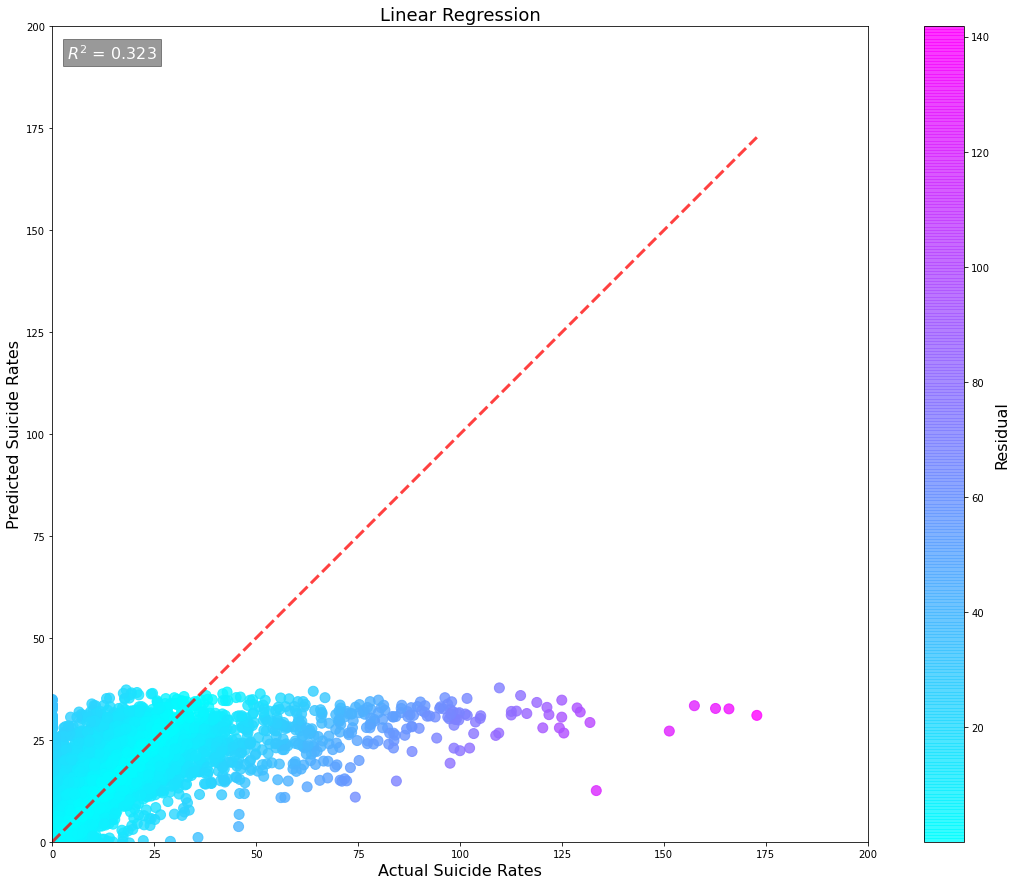

In [118]:
plot_regression(y_test, y_test_lr, title="Linear Regression", axis_label="Suicide Rates")

0.3215434227808899

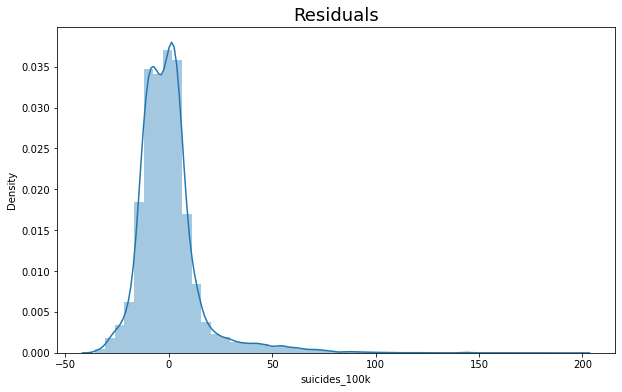

In [119]:
y_hat = lr.predict(X_train)
sns.distplot(y_train - y_hat)
plt.title("Residuals", size=18)
lr.score(X_train,y_train)

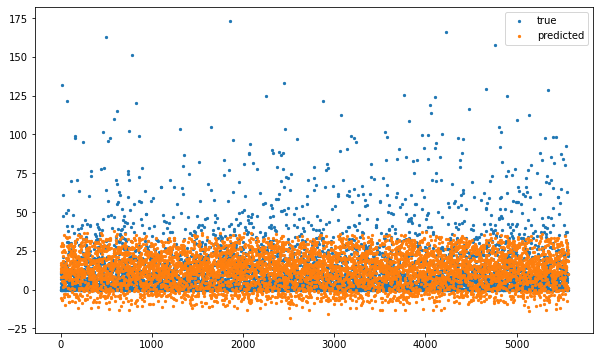

In [120]:
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_test_lr,label='predicted',s=5)
plt.legend()
plt.savefig('Accuracy_Linear_Regression.png')

plt.show()

# Random Forest Regression

Training

In [121]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=30, n_jobs=-1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, n_jobs=-1)

Testing

In [122]:
y_pred = rf_reg.predict(X_test) #make predictions for the test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(5564,)


array([ 9.9867,  0.3893,  1.575 , ...,  0.3607, 23.414 ,  9.2767])

In [123]:
y_train_rf = rf_reg.predict(X_train)

In [124]:
#computing the accuracy of the model performance
acc_train_rf = rf_reg.score(X_train, y_train)
acc_test_rf = rf_reg.score(X_test, y_test)

In [125]:
#computing root mean squared error (RMSE)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred))

In [126]:
print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_rf))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_rf))
print('Random Forest: The RMSE of the training set is:', rmse_train_rf)
print('Random Forest: The RMSE of the testing set is:', rmse_test_rf)

Random Forest: Accuracy on training Data: 0.984
Random Forest: Accuracy on test Data: 0.896
Random Forest: The RMSE of the training set is: 2.3948269178431314
Random Forest: The RMSE of the testing set is: 6.0614085605837325


In [127]:
# evaluate the predictions with some metrics
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) #RMSE: root mean square error
print("R²:", r2_score(y_test, y_pred))

RMSE: 6.0614085605837325
R²: 0.8963743288866938


In [128]:
y_test

27715     9.69
9912      0.49
26318     1.72
22711     0.00
14154     0.00
         ...  
15592     0.00
23472     0.76
9049      0.00
18204    23.06
13019    10.32
Name: suicides_100k, Length: 5564, dtype: float64

Feature importance - RF

In [129]:
df_imp_RF = pd.DataFrame(rf_reg.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp_RF

,Feature Importance
age,0.222723
hdi,0.203777
sex,0.151683
population,0.119221
country,0.097882
gdp_for_year,0.081733
gdp_per_capita,0.074646
year,0.048335


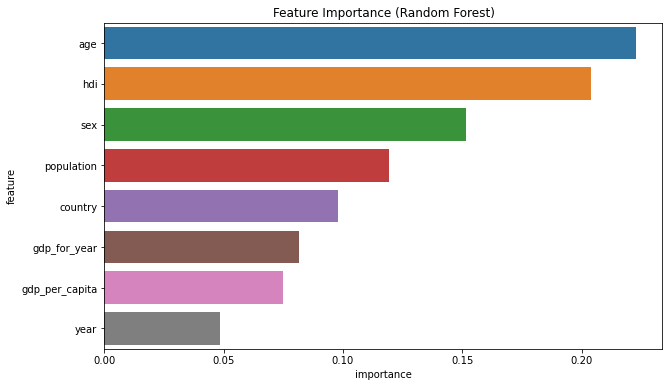

In [130]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_reg.feature_importances_
}).sort_values(by='importance', ascending=False)

# Visualize the feature importance
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Feature Importance (Random Forest)');

In [131]:
y_test.std() #if the RMSE is smaller than the standard deviation of y_test, it's usually a good model

18.831239661478303

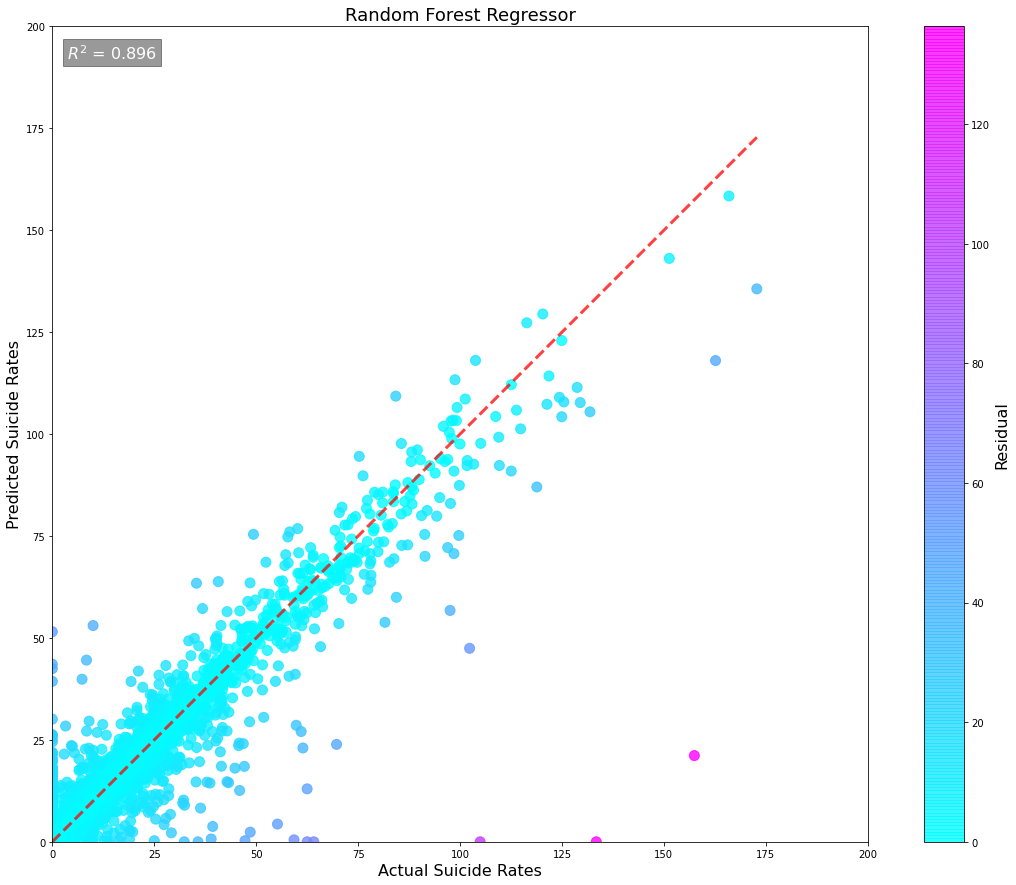

In [132]:
plot_regression(y_test, y_pred, title="Random Forest Regressor", axis_label="Suicide Rates")

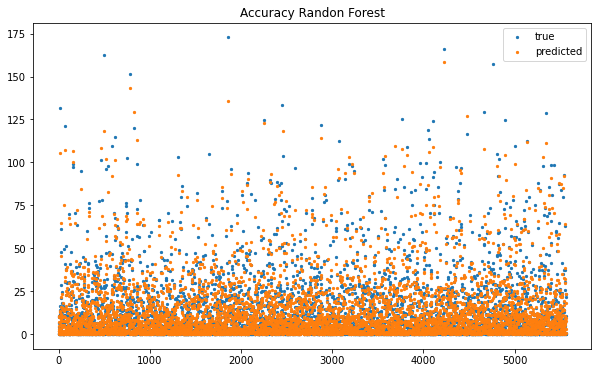

In [133]:
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_pred,label='predicted',s=5)
plt.legend()
plt.title('Accuracy Randon Forest')
plt.savefig('Accuracy_RF.png')

plt.show()

# Decision Tree : Regression

In [134]:
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.772
Decision Tree: Accuracy on test Data: 0.707

Decision Tree: The RMSE of the training set is: 9.062567764821653
Decision Tree: The RMSE of the testing set is: 10.18795590960023


**Visualization**
Let's also visualize the first few layers of the decision tree.

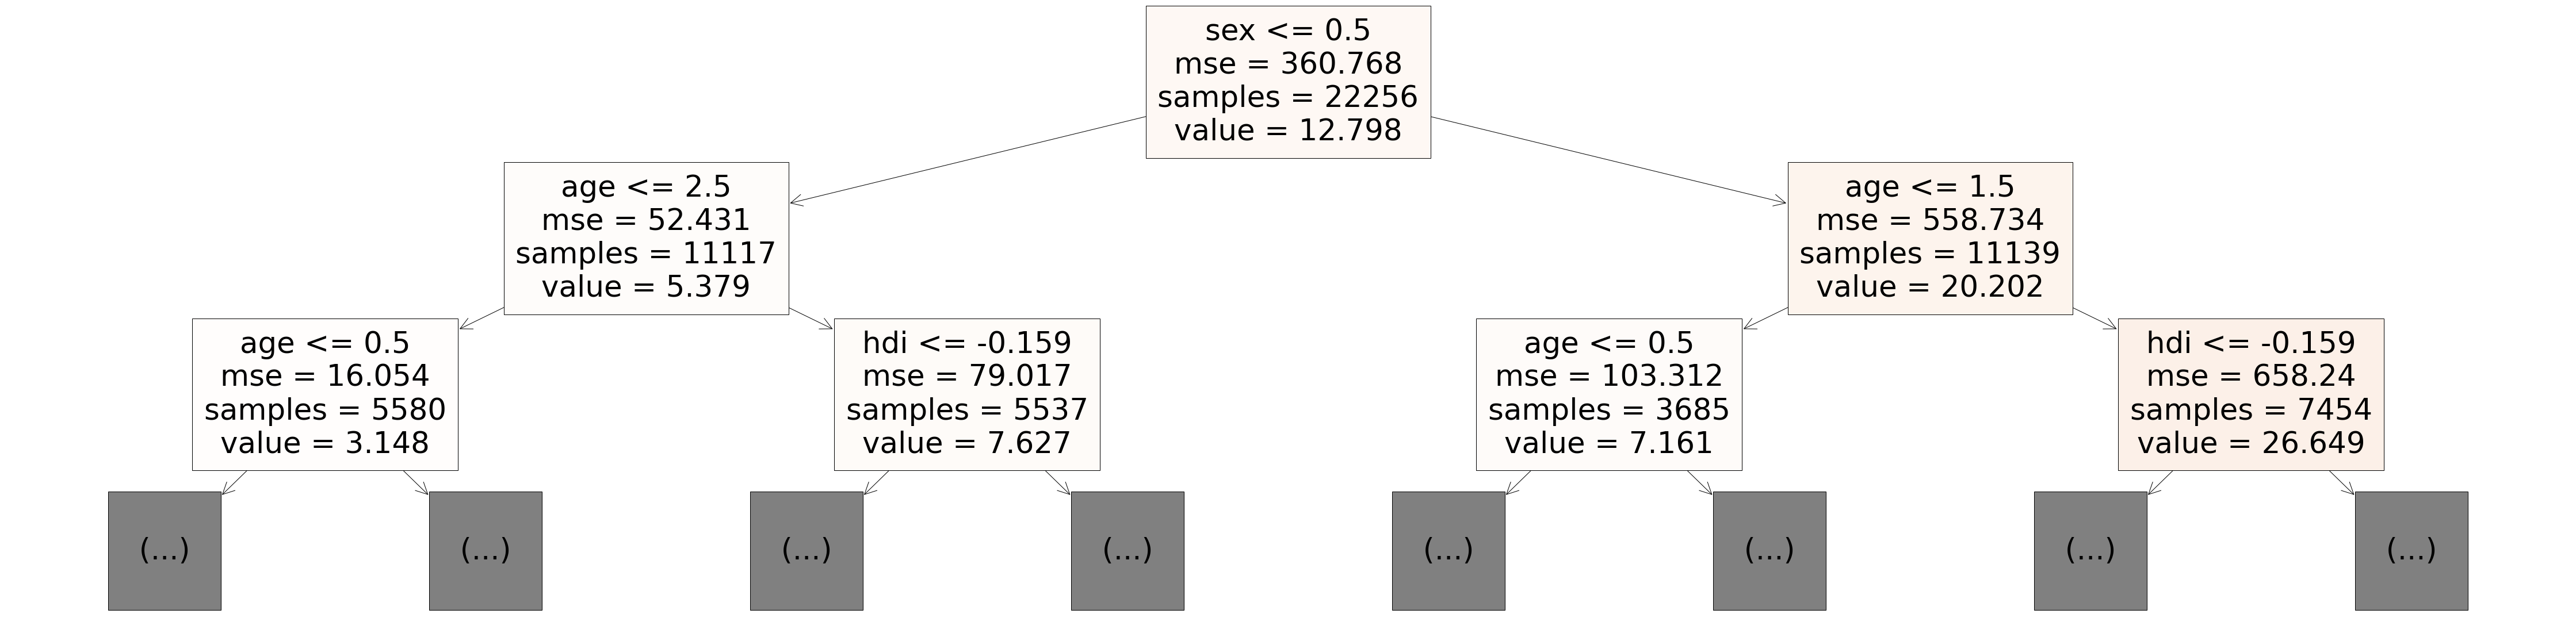

In [135]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 20))
plot_tree(tree, feature_names=X_train.columns, max_depth=2, filled=True);
plt.savefig("decistion_tree.png")


Feature importance

In [136]:
df_imp = pd.DataFrame(tree.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp

,Feature Importance
age,0.266975
hdi,0.220789
sex,0.197154
country,0.095547
gdp_for_year,0.076402
population,0.063302
gdp_per_capita,0.050470
year,0.029360


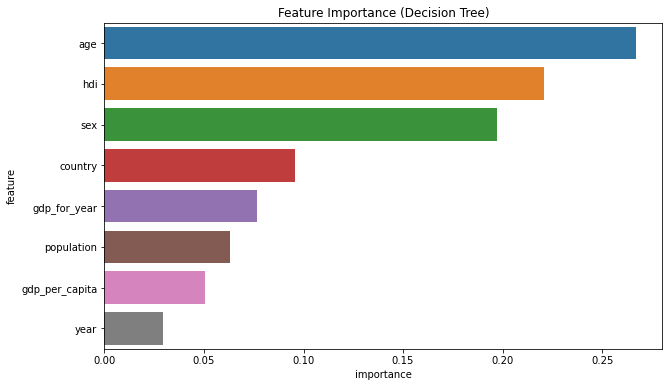

In [137]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree.feature_importances_
}).sort_values(by='importance', ascending=False)

# Visualize the feature importance
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Feature Importance (Decision Tree)');

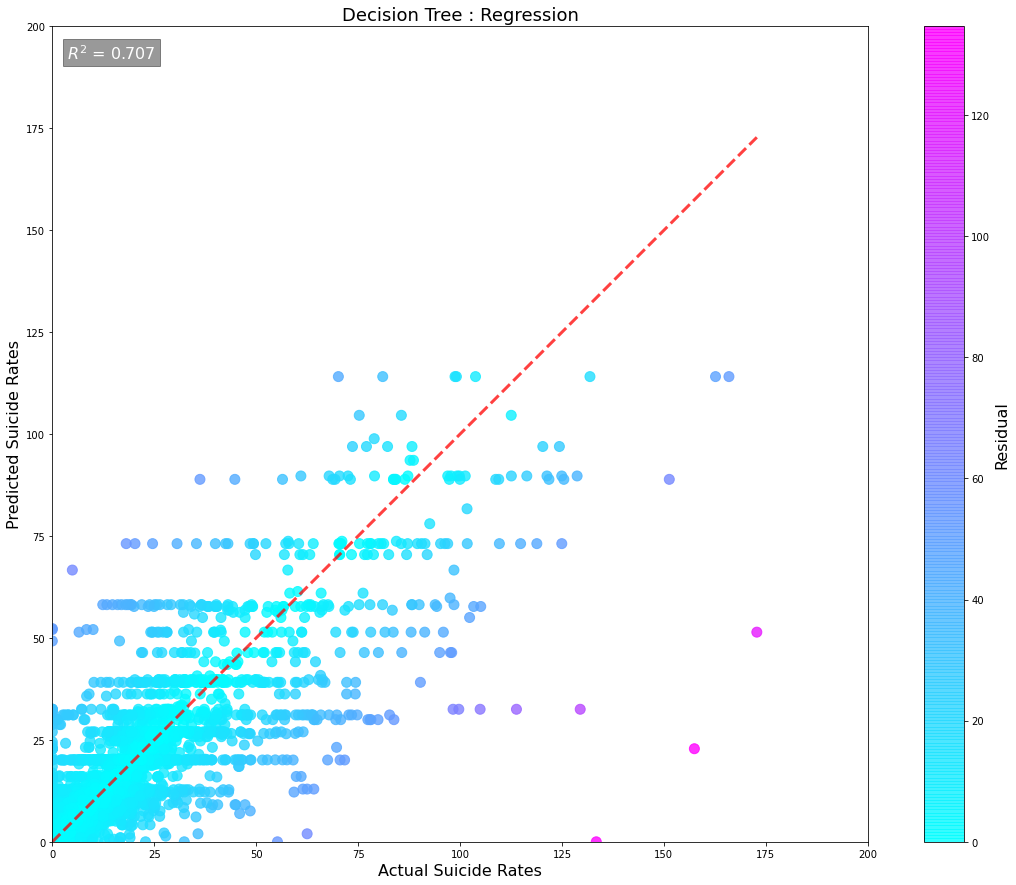

In [138]:
# visualizing the predictions
plot_regression(y_test, y_test_tree, title="Decision Tree : Regression", axis_label="Suicide Rates")

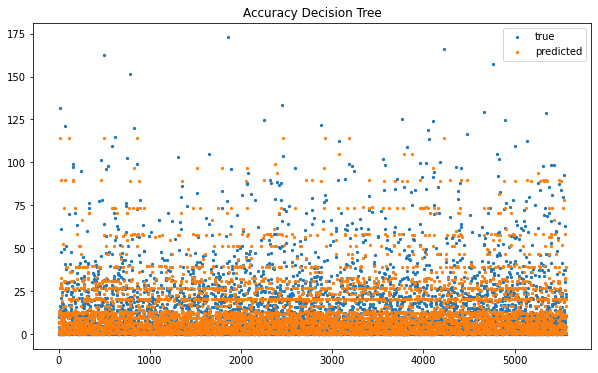

In [139]:
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_test_tree,label='predicted',s=5)
plt.legend()
plt.title('Accuracy Decision Tree')
plt.savefig('Accuracy_Decision_tree.png')

plt.show()

# Comparison of Results by Different Algorithms

In [140]:
data = {'Model': ['Linear regression', 'Decision tree regression', 'Random Forest'], 'Accuracy train': [0.22, 0.80, 0.98], 'Accuracy test': [0.23, 0.73, 0.89],'RMSE train': [16.68, 8.41, 2.44], 'RMSE test': [16.72, 9.85, 6.31]} 

In [141]:
# Create DataFrame  
df2 = pd.DataFrame(data)  
  
# Print the output.  
df2

,Model,Accuracy train,Accuracy test,RMSE train,RMSE test
0,Linear regression,0.22,0.23,16.68,16.72
1,Decision tree regression,0.80,0.73,8.41,9.85
2,Random Forest,0.98,0.89,2.44,6.31


**Conclusion** AS it is evidently visible, the RMSE value is the least for the Random Forest Regression for the testing set and quite an optimal value for the training set as well, thus, it performs the best for our model. Also the accuracy to RAndom forest medel is the best one followed by decision tree model.